In [45]:
#Including all the required libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [2]:
#Loading the dataset:
df = pd.read_csv('HeartDiseaseTrain-Test.csv')

In [5]:
#Cleaning the dataset:
df = df.dropna()

In [8]:
#Exploring overall structure and data types:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

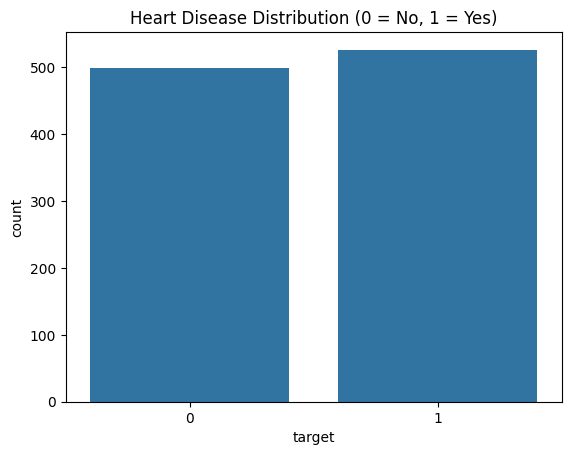

In [12]:
#Checking how many patients have heart disease:
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution (0 = No, 1 = Yes)')
plt.show()

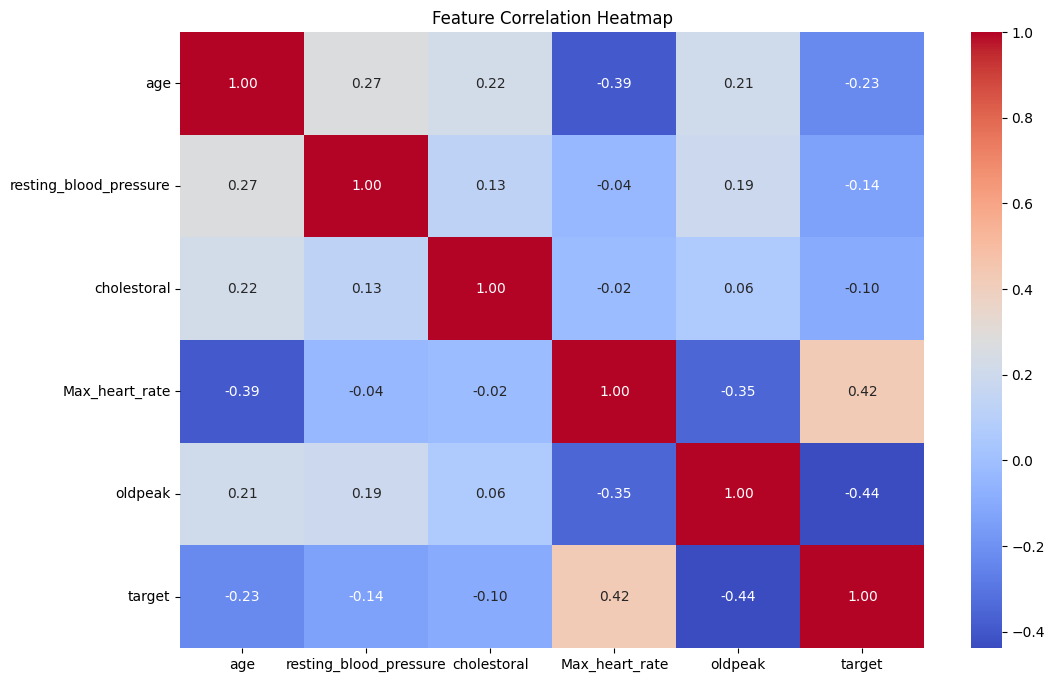

In [15]:
#Checking which features are most related to the presence of heart disease:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

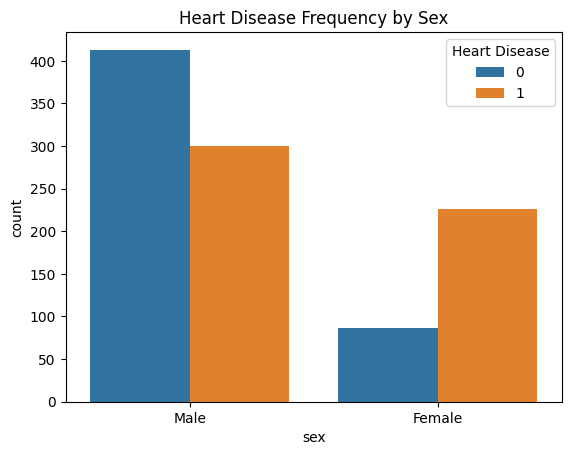

In [16]:
#Checking impact of sex on target:
sns.countplot(x='sex', hue='target', data=df)
plt.title('Heart Disease Frequency by Sex')
plt.legend(title='Heart Disease')
plt.show()

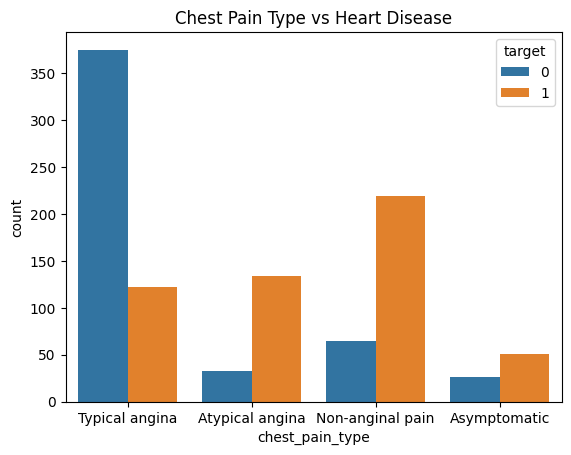

In [21]:
#Comparing chest pain type with heart disease:
sns.countplot(x='chest_pain_type', hue='target', data=df)
plt.title('Chest Pain Type vs Heart Disease')
plt.show()

In [23]:
#Splitting the dataset:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#One-hot encode categorical features:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

#Align columns - crucial for consistent feature sets:
train_cols = X_train_encoded.columns
test_cols = X_test_encoded.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_encoded[c] = 0
missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_encoded[c] = 0

X_test_encoded = X_test_encoded[train_cols]

In [26]:
#Initializing and training the model:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_encoded, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [27]:
#Making predictions:
y_pred = model.predict(X_test_encoded)

In [28]:
#Evaluating accuracy:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


In [34]:
#Evaluating confusion Matrix:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[76 26]
 [12 91]]


In [39]:
#Calculating ROC curve and AUC:
y_prob = model.predict_proba(X_test_encoded)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

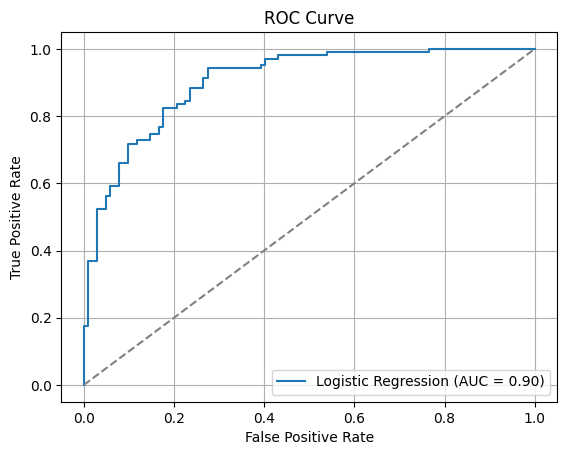

In [42]:
#Plotting the ROC Curve:
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
#Highlighting important features affecting prediction:
coefficients = pd.DataFrame({'Feature': X_train_encoded.columns, 'Coefficient': model.coef_[0]})
coefficients['Abs_Coeff'] = np.abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Abs_Coeff', ascending=False)
print(coefficients[['Feature', 'Coefficient']])

                                     Feature  Coefficient
8             chest_pain_type_Typical angina    -1.976172
17         vessels_colored_by_flourosopy_Two    -1.849516
5                                   sex_Male    -1.549729
21             thalassemia_Reversable Defect    -1.334389
18        vessels_colored_by_flourosopy_Zero     1.168345
16       vessels_colored_by_flourosopy_Three    -1.129343
13                                slope_Flat    -1.034390
15         vessels_colored_by_flourosopy_One    -0.958803
19                            thalassemia_No    -0.878588
6            chest_pain_type_Atypical angina    -0.725426
11            rest_ecg_ST-T wave abnormality     0.685994
12               exercise_induced_angina_Yes    -0.639529
4                                    oldpeak    -0.529304
10                           rest_ecg_Normal     0.427987
20                        thalassemia_Normal     0.354338
7           chest_pain_type_Non-anginal pain    -0.281776
14            